## K. Sarin Final Project: Data Science Programme — Cambridge University & Flatiron School
**Dataset:** Airline Passenger Satisfaction was downloaded from Kaggle datasets: [Airline Passenger satisfaction](https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction). 

The dataset contains customer satisfaction scores from 120,000+ airline passengers, including additional information about each passenger, their flight, and type of travel, as well as their evaluation of different factors like cleanliness, comfort, service, and overall experience


<u>**Ambitions of this data exercise are to develop analysis on two topics:**</u><br>

1. Analyse trends on flight usage
- *What age groups typically take shorter / longer haul flights?*
- *What patterns emerge when looking at the gender / age distribution of different flight types, distances?*

2. From an airlines perspective, understand the key factors that drive satisfaction:
- *What is the overall experience scores by different customer types (age, gender)?*
- *Amongst different cabin classes, how do scores differentiate?*
- *What are the key factors that drive dissatisfaction, and therefore where do airlines need to focus their attention?*

### Importing packages and data set

In [200]:
# import all packages to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

conn = sqlite3.connect('airline_passenger_satisfaction.csv')

In [202]:
df = pd.read_csv('airline_passenger_satisfaction.csv')

In [201]:
# Check type
type(df)

pandas.core.frame.DataFrame

In [203]:
# Check top 5
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [204]:
# Check bottom 5
df.tail()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied
129879,129880,Female,20,Returning,Personal,Economy Plus,337,0,0.0,1,...,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


In [205]:
# Check shape
df.shape

(129880, 24)

In [206]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

### Data cleansing checks

In [207]:
# Check columns
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [208]:
df.duplicated().value_counts()

False    129880
dtype: int64

Our descriptions are showing that there are:
- No issues with the column names
- No duplicates
- Missing data only in "Arrival Delay" column (393 rows). This is not needed within our dataset, so we will remove this from the analysis

In [209]:
#Check dropping 'Arrival Delay' column
df.drop('Arrival Delay', axis=1)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,4,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,5,3,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,5,2,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,4,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [210]:
#Dropping 'Arrival Delay' column in a new df1
df1 = df.drop('Arrival Delay', axis=1)

In [211]:
#Check df1 for deleted 'Arrival Delay'
df1.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [212]:
df1['Age'].value_counts()

39    3692
25    3511
40    3209
44    3104
41    3089
      ... 
74      61
76      60
79      52
78      44
85      25
Name: Age, Length: 75, dtype: int64

### Statistical and visual analysis to understand data better

In [213]:
df1.describe()

,ID,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


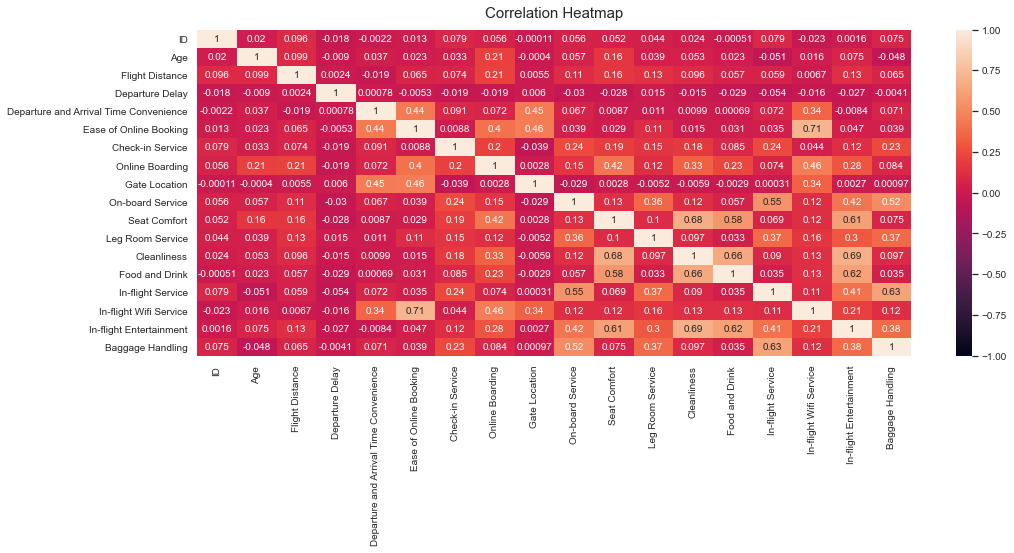

In [214]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12);

We can see the following interesting points from our dataset:
- Average age in the survey at 39 year old, with minimum of 7 and max of 85. Thereby indicating a solid range of data across the set
- Our average flight distance is slightly above a short-haul (defined as below 600-800 miles) but well below a long-haul (above 2,200-2,600 miles)
- Among all rating categories, 'In-flight Wifi Service' has the lowest average rating, while 'In-flight Service' has the highest average rating

Additionally comments on correlation for rating scores:
- No scores are very highly correlated to one another, suggesting that people review each question on it's individual merits rather than assigning similar scores to all questions based on experience
- 'In-flight Entertainment' seems to be the most influencable question on other scores

### Visualising this further:

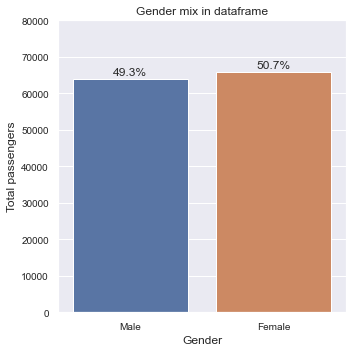

In [221]:
#The gender divide in our dataset, fairly balanced with slight tilt towards female passengers
plt.figure(figsize=(5,5))
total = float(len(df1))
g = sns.countplot(x="Gender", data=df1)
plt.title('Gender mix in dataframe', fontsize=12)
plt. ylim(0,80000)
g.set(xlabel='Gender', ylabel='Total passengers')
for p in g.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + (p.get_width()/2)
    y = (p.get_height()+1000)
    g.annotate(percentage, (x, y),ha='center', fontsize = 12)
plt.tight_layout()
plt.show()

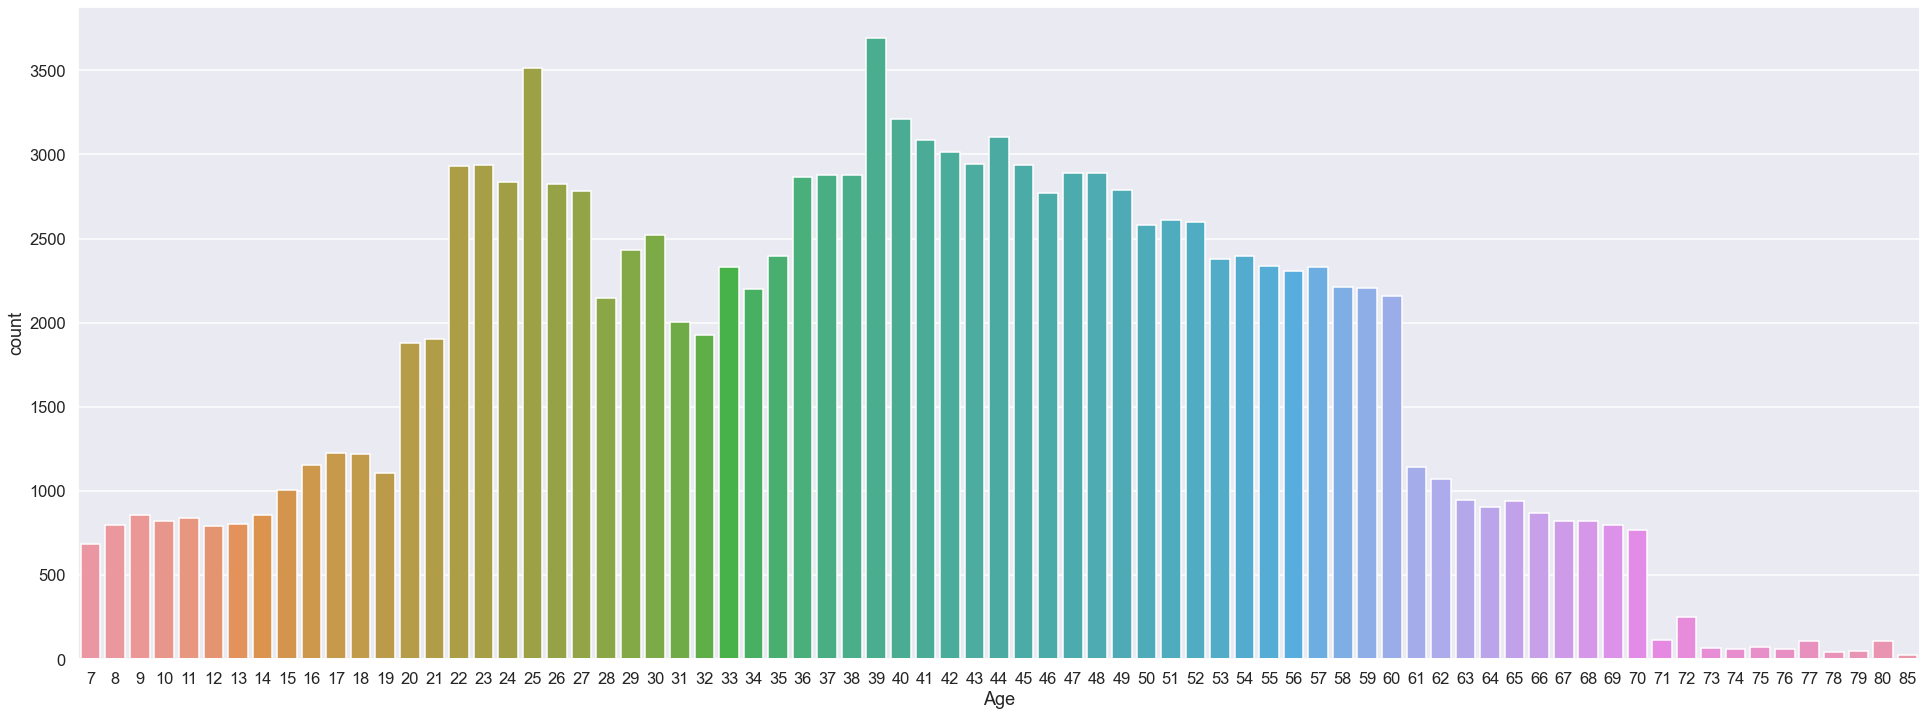

In [222]:
#The spread of ages in our dataset
sns.set_context('talk')
sns.countplot(x="Age", data=df1)
plt.gcf().set_size_inches(33, 12)

### Analysing trends on flight usage

Lets analyse trends on flight usage in terms of: 'Type of Travel', 'Class' and 'Flight Distance', by focusing our dataset on the following demographics (ignoring 'Child' i.e. <18 year olds for further analysis as travel assumed to rely on other age groups):

- Child: <18

- Youth: 18-24
- Young Adult: 25-34
- Adult: 35-44
- Mid life: 45-53
- Older Adult: 55-64 
- Senior: 65+

In [223]:
#create column with different age groups and add to df1
conditions = [
    (df1['Age'] <= 17.5),
    (df1['Age'] > 17.5) & (df['Age'] <= 24.5),
    (df1['Age'] > 24.5) & (df['Age'] <= 34.5),
    (df1['Age'] > 34.5) & (df['Age'] <= 44.5),
    (df1['Age'] > 44.5) & (df['Age'] <= 54.5),
    (df1['Age'] > 54.5) & (df['Age'] <= 64.5),
    (df1['Age'] > 64.5)
    ]

values = ['Child', 'Youth', 'Young Adult', 'Adult', 'Mid-Life', 'Older Adult', 'Senior']

df1['Age Groups'] = np.select(conditions, values)

df1

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Age Groups
0,1,Male,48,First-time,Business,Business,821,2,3,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,Mid-Life
1,2,Female,35,Returning,Business,Business,821,26,2,2,...,4,5,5,3,5,2,5,5,Satisfied,Adult
2,3,Male,41,Returning,Business,Business,853,0,4,4,...,5,3,5,5,3,4,3,3,Satisfied,Adult
3,4,Male,50,Returning,Business,Business,1905,0,2,2,...,5,5,4,4,5,2,5,5,Satisfied,Mid-Life
4,5,Female,49,Returning,Business,Business,3470,0,3,3,...,4,4,5,4,3,3,3,3,Satisfied,Mid-Life
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,4,4,...,1,4,4,4,5,4,4,4,Neutral or Dissatisfied,Young Adult
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,5,3,...,2,5,2,2,4,3,2,5,Neutral or Dissatisfied,Adult
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,5,2,...,3,4,3,3,4,2,3,5,Neutral or Dissatisfied,Adult
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,4,4,...,4,5,3,3,4,5,3,5,Satisfied,Mid-Life


In [287]:
#Rearranging dataset so it is organised by the age demographic
custom_dict = {'Child':0, 'Youth':1, 'Young Adult':2, 'Adult':3, 'Mid-Life':4, 'Older Adult':5, 'Senior':6}  
df1['Rank'] = df1['Age Groups'].map(custom_dict)
df1

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Age Groups,Rank
63502,63503,Male,8,Returning,Personal,Economy,1956,0,2,2,...,4,4,4,3,2,4,2,Neutral or Dissatisfied,Child,0
75034,75035,Female,10,Returning,Personal,Economy,236,8,4,2,...,1,1,1,2,2,1,5,Neutral or Dissatisfied,Child,0
53905,53906,Male,15,Returning,Personal,Economy,140,0,5,3,...,3,5,5,3,3,5,1,Neutral or Dissatisfied,Child,0
124561,124562,Male,15,First-time,Business,Economy,453,2,0,2,...,5,4,4,2,2,4,1,Neutral or Dissatisfied,Child,0
53908,53909,Female,12,Returning,Personal,Economy,191,1,3,2,...,2,2,2,1,2,2,1,Neutral or Dissatisfied,Child,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387,8388,Female,68,Returning,Personal,Economy Plus,701,14,4,3,...,3,5,2,5,3,5,1,Neutral or Dissatisfied,Senior,6
125487,125488,Female,67,Returning,Business,Economy Plus,1417,0,5,5,...,4,3,1,4,4,4,4,Satisfied,Senior,6
110792,110793,Female,65,Returning,Business,Economy,705,16,3,3,...,4,4,3,3,4,3,3,Satisfied,Senior,6
74194,74195,Male,65,Returning,Personal,Economy,641,0,5,2,...,3,4,4,5,2,4,4,Neutral or Dissatisfied,Senior,6


In [288]:
#Rearranging dataset so it is organised by the age demographic
df1.sort_values(by=['Rank'], inplace=True)
df1

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Age Groups,Rank
63502,63503,Male,8,Returning,Personal,Economy,1956,0,2,2,...,4,4,4,3,2,4,2,Neutral or Dissatisfied,Child,0
91490,91491,Female,11,Returning,Personal,Economy Plus,859,0,5,2,...,5,3,3,5,2,3,5,Neutral or Dissatisfied,Child,0
44956,44957,Female,12,Returning,Personal,Economy,334,0,5,4,...,3,5,5,5,4,5,4,Neutral or Dissatisfied,Child,0
109597,109598,Female,16,First-time,Business,Economy,861,48,3,3,...,5,1,1,4,3,1,4,Neutral or Dissatisfied,Child,0
36988,36989,Female,14,First-time,Business,Economy,759,4,2,2,...,4,5,5,2,2,5,3,Neutral or Dissatisfied,Child,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44162,44163,Female,68,First-time,Business,Economy,229,0,5,1,...,2,2,2,2,1,2,2,Neutral or Dissatisfied,Senior,6
115363,115364,Female,75,Returning,Business,Economy,390,24,3,2,...,2,4,1,2,2,2,2,Neutral or Dissatisfied,Senior,6
63147,63148,Male,70,Returning,Business,Business,447,0,4,4,...,5,5,2,5,4,5,5,Satisfied,Senior,6
109730,109731,Female,85,Returning,Business,Business,187,17,3,3,...,4,4,4,1,2,3,4,Neutral or Dissatisfied,Senior,6


In [289]:
#Rearranging dataset so it is organised by the age demographic
df1.drop('Rank', axis=1)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Age Groups
63502,63503,Male,8,Returning,Personal,Economy,1956,0,2,2,...,3,4,4,4,3,2,4,2,Neutral or Dissatisfied,Child
91490,91491,Female,11,Returning,Personal,Economy Plus,859,0,5,2,...,3,5,3,3,5,2,3,5,Neutral or Dissatisfied,Child
44956,44957,Female,12,Returning,Personal,Economy,334,0,5,4,...,5,3,5,5,5,4,5,4,Neutral or Dissatisfied,Child
109597,109598,Female,16,First-time,Business,Economy,861,48,3,3,...,1,5,1,1,4,3,1,4,Neutral or Dissatisfied,Child
36988,36989,Female,14,First-time,Business,Economy,759,4,2,2,...,4,4,5,5,2,2,5,3,Neutral or Dissatisfied,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44162,44163,Female,68,First-time,Business,Economy,229,0,5,1,...,2,2,2,2,2,1,2,2,Neutral or Dissatisfied,Senior
115363,115364,Female,75,Returning,Business,Economy,390,24,3,2,...,2,2,4,1,2,2,2,2,Neutral or Dissatisfied,Senior
63147,63148,Male,70,Returning,Business,Business,447,0,4,4,...,5,5,5,2,5,4,5,5,Satisfied,Senior
109730,109731,Female,85,Returning,Business,Business,187,17,3,3,...,4,4,4,4,1,2,3,4,Neutral or Dissatisfied,Senior


In [290]:
#Rearranging dataset so it is organised by the age demographic
df1.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Age Groups,Rank
63502,63503,Male,8,Returning,Personal,Economy,1956,0,2,2,...,4,4,4,3,2,4,2,Neutral or Dissatisfied,Child,0
91490,91491,Female,11,Returning,Personal,Economy Plus,859,0,5,2,...,5,3,3,5,2,3,5,Neutral or Dissatisfied,Child,0
44956,44957,Female,12,Returning,Personal,Economy,334,0,5,4,...,3,5,5,5,4,5,4,Neutral or Dissatisfied,Child,0
109597,109598,Female,16,First-time,Business,Economy,861,48,3,3,...,5,1,1,4,3,1,4,Neutral or Dissatisfied,Child,0
36988,36989,Female,14,First-time,Business,Economy,759,4,2,2,...,4,5,5,2,2,5,3,Neutral or Dissatisfied,Child,0


In [291]:
# Create new dataframe organised by age groups and class
df2 = df1.groupby(['Age Groups','Class'],as_index=False).count()

df2.head()

,Age Groups,Class,ID,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Rank
0,Adult,Business,17127,17127,17127,17127,17127,17127,17127,17127,...,17127,17127,17127,17127,17127,17127,17127,17127,17127,17127
1,Adult,Economy,11097,11097,11097,11097,11097,11097,11097,11097,...,11097,11097,11097,11097,11097,11097,11097,11097,11097,11097
2,Adult,Economy Plus,1852,1852,1852,1852,1852,1852,1852,1852,...,1852,1852,1852,1852,1852,1852,1852,1852,1852,1852
3,Child,Business,1642,1642,1642,1642,1642,1642,1642,1642,...,1642,1642,1642,1642,1642,1642,1642,1642,1642,1642
4,Child,Economy,7151,7151,7151,7151,7151,7151,7151,7151,...,7151,7151,7151,7151,7151,7151,7151,7151,7151,7151


In [389]:
#create pandas sub dataframes by age groups for detailed analysis
Youth_df = df1[(df1['Age Groups'] == 'Youth')]
Young_Adult_df = df1[(df1['Age Groups'] == 'Young Adult')]
Adult_df = df1[(df1['Age Groups'] == 'Adult')]
Mid_Life_df = df1[(df1['Age Groups'] == 'Mid-Life')]
Older_Adult_df = df1[(df1['Age Groups'] == 'Older Adult')]
Senior_df = df1[(df1['Age Groups'] == 'Senior')]

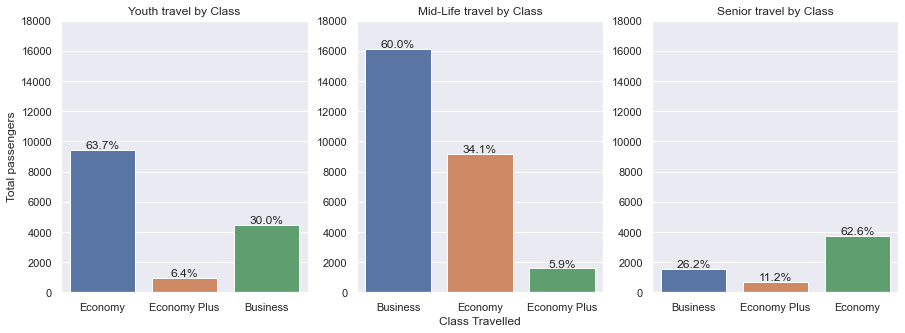

In [391]:
#Look at how the 'Class' varies through lifetime by plotting three different age groups 
#('Youth,'Mid-Life','Senior') and the relative percentage of each
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))

ax_1 = axes[0]
e = sns.countplot(x="Class", data=Youth_df, ax=ax_1)
ax_1.set_title('Youth travel by Class', fontsize = 12)
sns.set(rc = {'figure.figsize':(5,2)})
e.set(xlabel='', ylabel='Total passengers')
ax_1.set_ylim(0,18000)

total = len(Youth_df)
for p in e.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + (p.get_width()/2)
    y = (p.get_height()+100)
    e.annotate(percentage, (x, y),ha='center', fontsize = 12)
    
ax_2 = axes[1]
f = sns.countplot(x="Class", data=Mid_Life_df, ax=ax_2)
ax_2.set_title('Mid-Life travel by Class', fontsize = 12)
f.set(xlabel='Class Travelled', ylabel='')
ax_2.set_ylim(0,18000)


total2 = len(Mid_Life_df)
for p in f.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total2)
    x = p.get_x() + (p.get_width()/2)
    y = (p.get_height()+100)
    f.annotate(percentage, (x, y),ha='center', fontsize = 12)
    
ax_3 = axes[2]
g = sns.countplot(x="Class", data=Senior_df, ax=ax_3)
ax_3.set_title('Senior travel by Class', fontsize = 12)
g.set(xlabel='', ylabel='')
ax_3.set_ylim(0,18000)


total3 = len(Senior_df)
for p in g.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total3)
    x = p.get_x() + (p.get_width()/2)
    y = (p.get_height()+100)
    g.annotate(percentage, (x, y),ha='center', fontsize = 12);

**Let us analyse how the 'Class' people travel in varies through different stages of life**

The charts above shows us that Economy is the main 'Class' of choice at either end of life, at younger ages and post retirement. This is not unexpected given monetary squeezes at these periods. During mid-life, when people are likely to be most settled, 'Business' is far more chosen than at other life periods.

**Let us now analyse how the 'Flight Distance' travelled varies through different life stages**

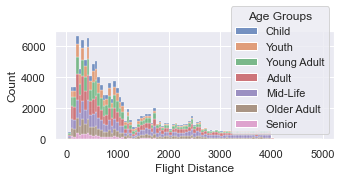

In [392]:
# Overall view of distance travelled in our dataframe by different age groups
sns.histplot(data=df1, x="Flight Distance", hue="Age Groups", multiple="stack")
sns.set(rc = {'figure.figsize':(25,10)})
sns.set(font_scale=1)

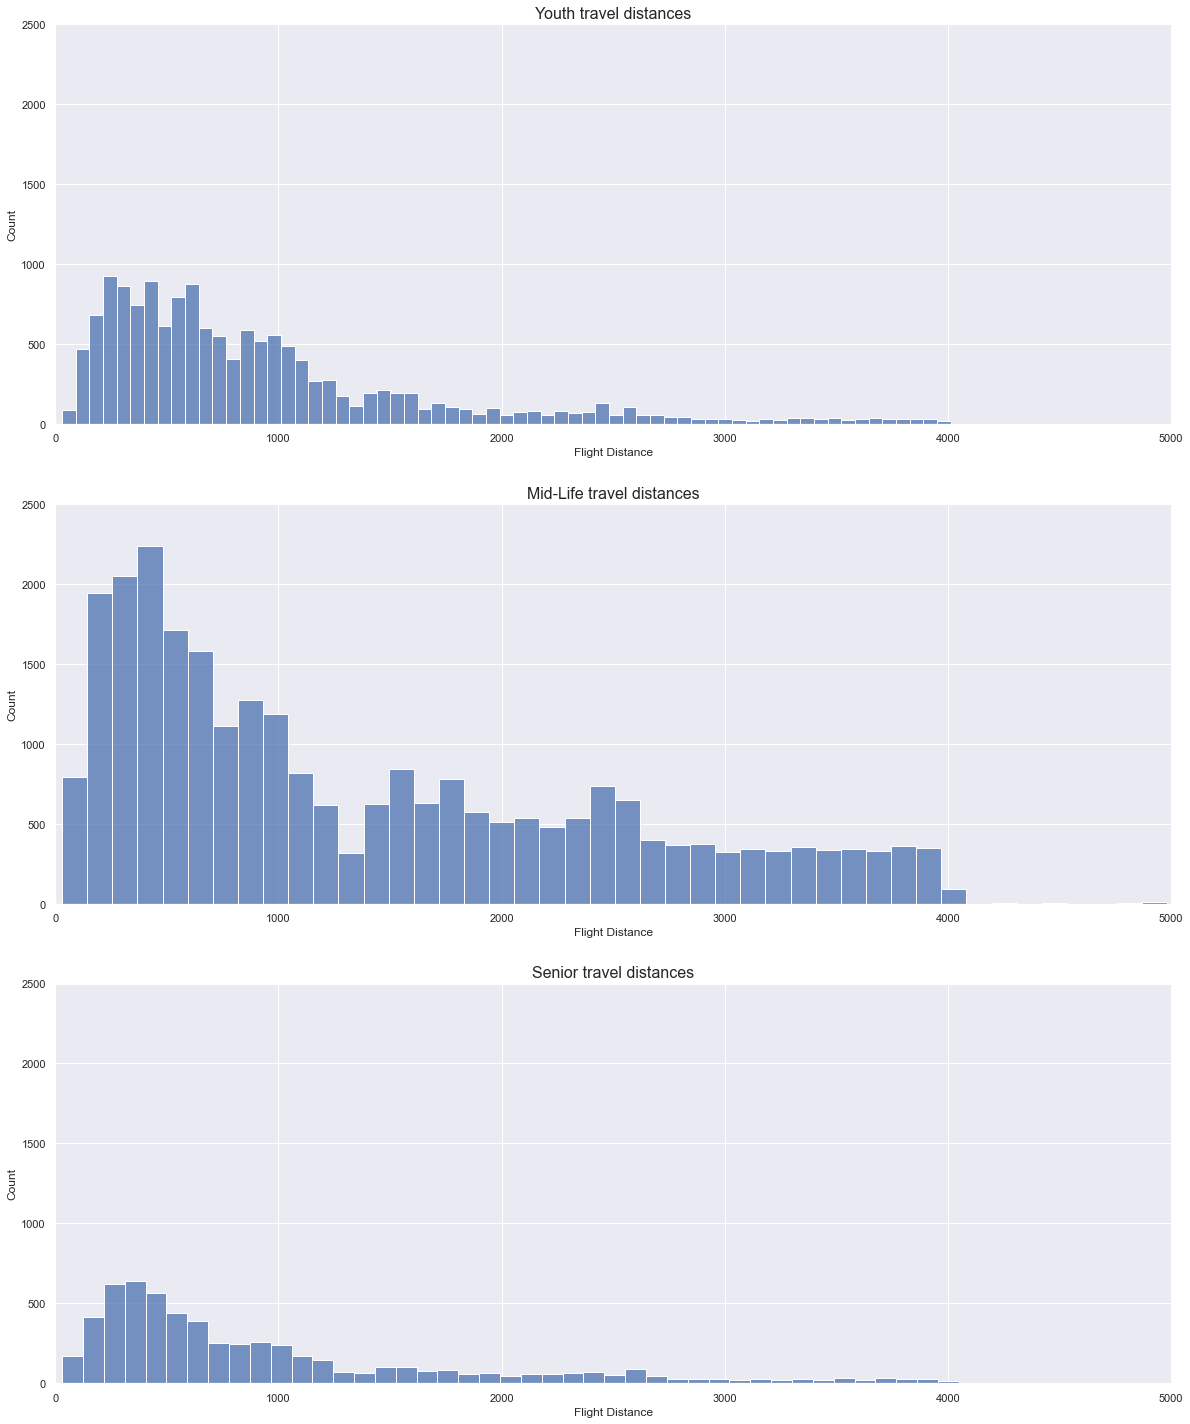

In [394]:
# Now deep-diving to look at three different demographics again 'Youth', 'Mid-Life', 'Senior
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(20, 25))

ax_1 = axes[0]
Ytravel = sns.histplot(data=Youth_df, x="Flight Distance", ax=ax_1)
sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=1)
ax_1.set_xlim(0,5000)
ax_1.set_ylim(0,2500)
ax_1.set_title('Youth travel distances', fontsize = 16)

ax_2 = axes[1]
sns.histplot(data=Mid_Life_df, x="Flight Distance", multiple="stack", ax=ax_2)
sns.set(rc = {'figure.figsize':(10,10)})
sns.set(font_scale=1)
ax_2.set_xlim(0,5000)
ax_2.set_ylim(0,2500)
ax_2.set_title('Mid-Life travel distances', fontsize = 16)

ax_3 = axes[2]
sns.histplot(data=Senior_df, x="Flight Distance", multiple="stack", ax=ax_3)
sns.set(rc = {'figure.figsize':(10,10)})
sns.set(font_scale=1)
ax_3.set_xlim(0,5000)
ax_3.set_ylim(0,2500)
ax_3.set_title('Senior travel distances', fontsize = 16);

We can see that short-haul flights are dominant and interesting trends emerge in the age groups:
- Youth travel is heavily focused in the short-haul territory, as we move to longer distances very few of these demographics travel
- Seniors similarly travel mostly in the short-haul territory and do not engage very much in the longer-haul
- Mid-life and Adult are the dominant travel demographics, and they represent a higher proportion of longer-haul flight passengers

We can cross check these findings to statistical analysis, looking at the mean distances travelled by different demographics:

In [395]:
df1.groupby('Age Groups')['Flight Distance'].mean()

Age Groups
Adult          1252.174259
Child           926.374124
Mid-Life       1383.071649
Older Adult    1270.227275
Senior          958.719539
Young Adult    1164.045898
Youth           933.154506
Name: Flight Distance, dtype: float64

The table above corroborates our bar chart graph, as 'Child' 'Youth' and 'Senior' have significantly lower average travel distances than other demographics. 'Mid-Life' passengers travel on average the furthest at 1,383 miles vs 'Senior' at lowest of 959 miles

Taking both analyses together we can see the following for different demographics:

**Youth**
- Fly shorter-haul flights generally (933 miles mean) 
- Usually travel in Economy class

**Adults**
- Significant range among different age sub-groups and life stage
- Average flight distances rise with age from 1,164 miles at Young-Adult to 1,383 miles for Mid-Life
- As distances rise, the class choices also rise, with Mid-Life choosing Business more frequently

**Older / Senior**
- Flight distances fall as begin to reach 'Older Adult' and 'Senior' falling back to lower distances, with 'Senior' average of 959 miles mean
- As distances fall, these demographics switch back towards Economy as the primary class

### Analysing the key factors that drive (dis)satisfaction among customers

Overall let's look at how satisfaction vs neutral or dissatisfaction ratings varied across different demographics

In [397]:
# Summary of satisfaction vs neutral or dissatisfied
df1.groupby(['Satisfaction']).agg({'ID':['count']}).apply(lambda x: x*100/x.sum()).round(1)

,ID
,count
Satisfaction,
Neutral or Dissatisfied,56.6
Satisfied,43.4


In [398]:
# Looking at how satisfaction varies across our age groups, with percentage of total base
df1.groupby(['Age Groups', 'Satisfaction']).agg({'ID':['count']}).apply(lambda x: x*100/x.sum()).round(1)


ID
                                    count
Age Groups  Satisfaction                 
Adult       Neutral or Dissatisfied  11.5
            Satisfied                11.7
Child       Neutral or Dissatisfied   6.3
            Satisfied                 1.3
Mid-Life    Neutral or Dissatisfied   8.7
            Satisfied                12.0
Older Adult Neutral or Dissatisfied   6.9
            Satisfied                 6.7
Senior      Neutral or Dissatisfied   3.8
            Satisfied                 0.8
Young Adult Neutral or Dissatisfied  12.0
            Satisfied                 7.0
Youth       Neutral or Dissatisfied   7.4
            Satisfied                 4.0

We can see that neutral or dissatisfaction ratings are broadly equally rated in total numbers of customers across different demographics. When looking within individual demographics:

- 'Mid-Life' Adults and 'Older Adults' are generally more satisfied than dissatisfied
- At either end of the demographics, Youth-Young Adult and Senior, there are notably more neutral or dissatisfied ratings, with a significant gap particularly for Senior population, where only 1 in 5 passengers said they were satisfied

**Let's compare the data on customers that rated "Neutral or Dissatisfied" to those that voted Satisfied to understand the main drivers better**

In [449]:
Dis_df = df1[df1['Satisfaction'] == 'Neutral or Dissatisfied']
Dis_df.describe().round(2)

,ID,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Rank
count,73452.00,73452.00,73452.00,73452.00,73452.00,73452.00,73452.00,73452.00,73452.00,73452.00,73452.00,73452.00,73452.00,73452.00,73452.00,73452.00,73452.00,73452.00,73452.00
mean,64507.31,37.65,929.72,16.41,3.13,2.55,3.04,2.66,2.98,3.02,3.04,2.99,2.93,2.96,3.39,2.40,2.89,3.37,2.79
std,37554.51,16.47,791.29,40.18,1.50,1.21,1.28,1.15,1.20,1.28,1.30,1.30,1.33,1.35,1.18,0.96,1.32,1.18,1.71
min,1.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,31813.25,25.00,372.00,0.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00
50%,64081.50,37.00,674.00,0.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,2.00,3.00,4.00,3.00
75%,97173.25,50.00,1149.00,15.00,4.00,3.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00
max,129880.00,85.00,4983.00,1592.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,6.00


In [408]:
Sat_df = df1[df1['Satisfaction'] == 'Satisfied']

Sat_df.describe().round(2)

,ID,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Rank
count,56428.00,56428.00,56428.00,56428.00,56428.00,56428.00,56428.00,56428.00,56428.00,56428.00,56428.00,56428.00,56428.00,56428.00,56428.00,56428.00,56428.00,56428.00,56428.00
mean,65504.38,41.74,1529.54,12.51,2.96,3.03,3.65,4.03,2.97,3.86,3.97,3.82,3.75,3.53,3.97,3.16,3.96,3.97,3.21
std,37406.22,12.80,1127.60,35.01,1.56,1.58,1.16,1.20,1.37,1.13,1.14,1.18,1.14,1.23,1.09,1.59,1.08,1.10,1.35
min,2.00,7.00,31.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00
25%,33200.50,32.00,525.00,0.00,2.00,2.00,3.00,4.00,2.00,3.00,4.00,3.00,3.00,3.00,4.00,2.00,4.00,4.00,2.00
50%,65948.00,43.00,1249.00,0.00,3.00,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00
75%,97757.75,51.00,2407.00,9.00,4.00,4.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00
max,129879.00,85.00,4983.00,1305.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,6.00


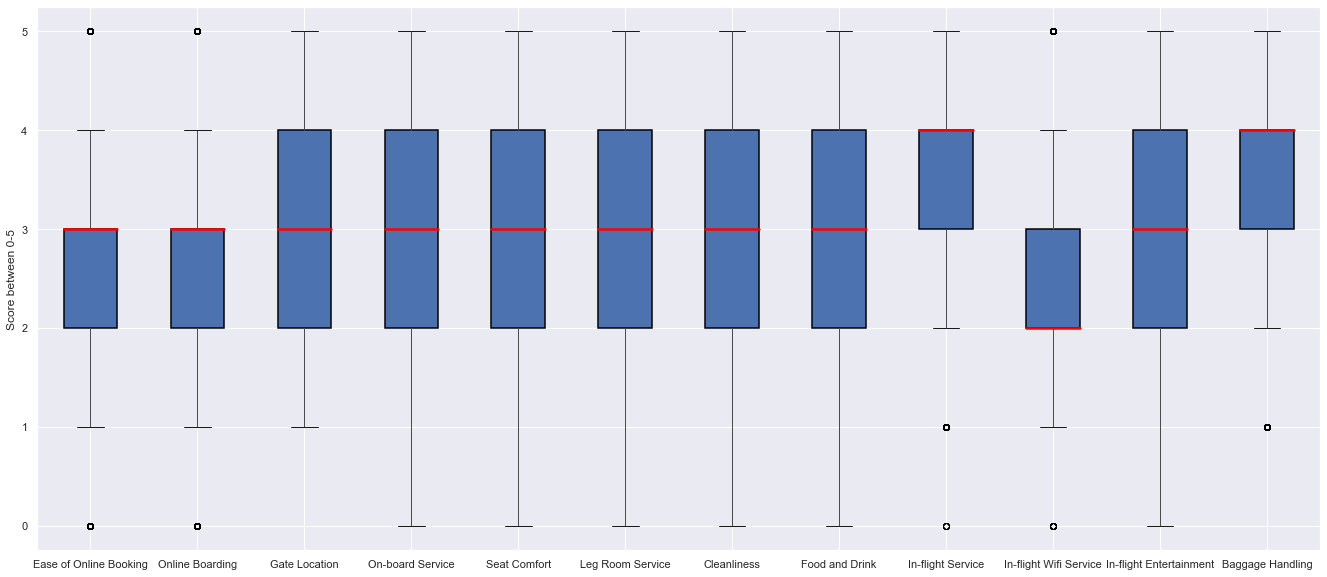

In [453]:
# Visualise the 'Neutral / Dissatisfied' through a boxplot

plt.figure(figsize=(23,10)) 
satisfy_bplt = Dis_df.boxplot(column = [
    'Ease of Online Booking', 
    'Online Boarding', 
    'Gate Location', 
    'On-board Service',
    'Seat Comfort',
    'Leg Room Service',
    'Cleanliness',
    'Food and Drink',
    'In-flight Service',
    'In-flight Wifi Service',
    'In-flight Entertainment',
    'Baggage Handling'
],
patch_artist=True, boxprops = dict(color="black",linewidth=1.5), medianprops = dict(color="red",linewidth=2.5))
satisfy_bplt.plot()
plt.ylabel('Score between 0-5')
plt.show();

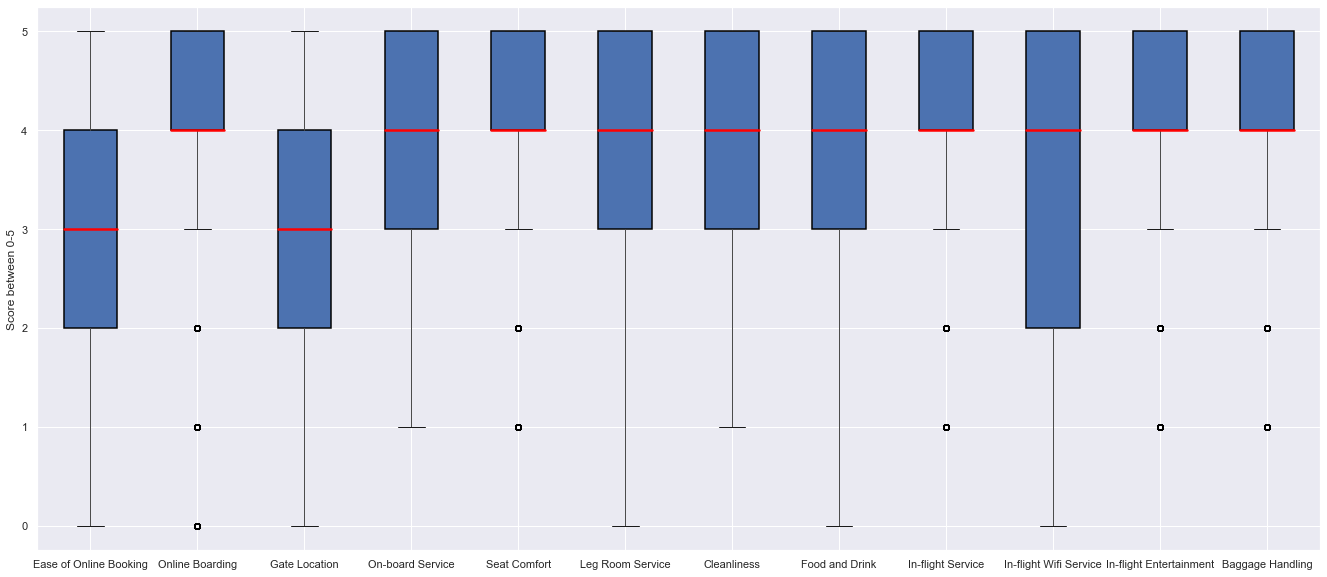

In [455]:
# Visualise the 'Satisfied' through a boxplot

plt.figure(figsize=(23,10)) 
satisfy_bplt = Sat_df.boxplot(column = [
    'Ease of Online Booking', 
    'Online Boarding', 
    'Gate Location', 
    'On-board Service',
    'Seat Comfort',
    'Leg Room Service',
    'Cleanliness',
    'Food and Drink',
    'In-flight Service',
    'In-flight Wifi Service',
    'In-flight Entertainment',
    'Baggage Handling'
],
patch_artist=True, boxprops = dict(color="black",linewidth=1.5), medianprops = dict(color="red",linewidth=2.5))
satisfy_bplt.plot()
plt.ylabel('Score between 0-5')
plt.show();



From the 'describe' summary and also the visual we can see the most important factor driving dissatisfaction is **In-flight Wifi Service**:
- **Neutral or Dissatisfied customers**: This is the lowest average score of all factors at 2.397, indicating it is a key reason driving dissatisfaction. Additionally, it has the lowest standard deviation of all factors at 0.964, with the lowest spread in answers and closest to the mean. Among all the answers, giving a low score for in-flight wifi services was the most prevalant factor
- **Satisfied customers**: Contrastingly, in-flight wifi had the highest standard deviation, indicating a higher spread in answers, and therefore more contention even among satisfied customers

Let's try to understand more about our dissatisfied customer base, understanding what class they have sat in, and how they scored in-flight Wifi services:

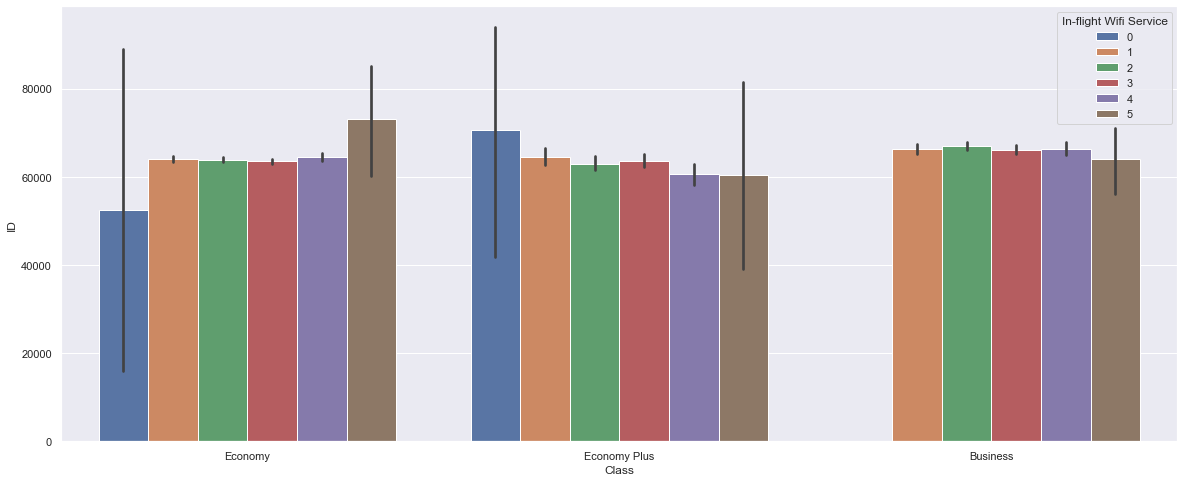

In [460]:
plt.figure(figsize=(20,8)) 
ax = sns.barplot(x="Class", y="ID", hue="In-flight Wifi Service", data=Dis_df)
plt.show()

What is particularly interesting from the chart above is how dominant 'Economy Plus' is within the dissatisfied customer base. 'Economy Plus' represents a relatively small proportion of the overall survey (refer back to travel by class bar charts across demographics), however it represents a significant proportion of the dissatisfied customer base. 

Additionally Wifi services was broadly equally weighted for 'Business', indexed towards higher ratings for 'Economy' and notably low rated for 'Economy Plus'

This suggests that airline companies should dedicate more time to ensuring 'Economy Plus' is notably distinctive, with additional effort towards Wifi service enablement in this cabin.

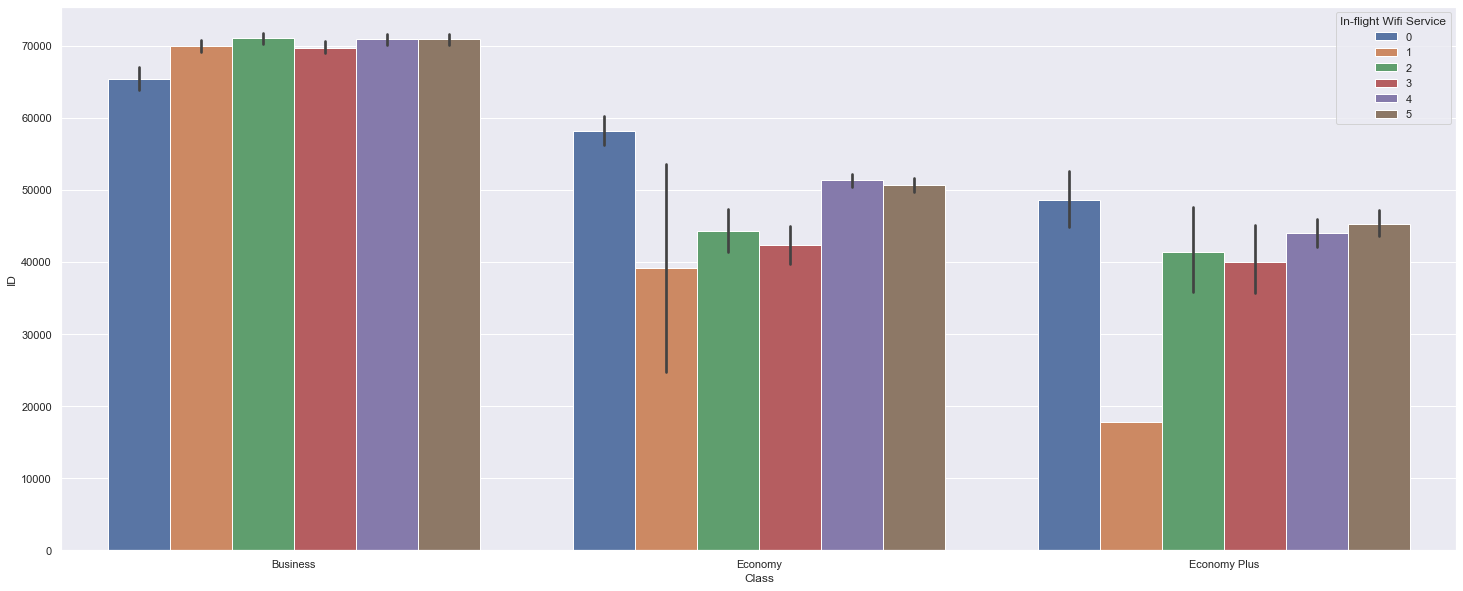

In [33]:
ax = sns.barplot(x="Class", y="ID", hue="In-flight Wifi Service", data=Sat_df)
plt.show()

Within our satisfied customer base, 'Business' is the dominant class as expected, with wifi services generally rated equally. Interestingly for 'Economy' and 'Economy Plus' particularly, the proportion of passengers rating in-flight wifi services as lowest satisfaction (1) is significantly lower than other ratings. This indicates that strong in-flight wifi services is a key driver for passengers returning an overall satisfied rating. As such it validates the point that airlines should focus attention towards improving and maintaining this.